In [1]:
import cv2 
import numpy as np
import glob
import os
from itertools import combinations 
from itertools import product
import random
import matplotlib.pyplot as plt
from random import randrange
import sys
#apt install python-pydot python-pydot-ng graphviz

In [2]:
!{sys.executable} -m pip install pydot
!{sys.executable} -m pip install pydotplus
!{sys.executable} -m pip install graphviz

     |################################| 278 kB 4.5 MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=65c835525ed0a7e58f63847555266f9ae6eab4d84170f4c8eebc1439d41fdcb2
  Stored in directory: /root/.cache/pip/wheels/1f/5c/ba/f931f74fcac8f48b18ae597279203b1c1f92fc76249c2b6f66
Successfully built pydotplus


In [3]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense, MaxPooling2D, Convolution2D, Dropout, Input, Flatten,Conv2D,Conv2DTranspose,Lambda,concatenate,GlobalMaxPooling2D,Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model,Sequential
#from keras.initializers.h as 
from tensorflow.python.keras.utils.vis_utils import plot_model
#from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2 
from pandas import read_excel
import pydot
#pip install xlrd

In [4]:
path_input_images =  '/tensorflow/IITD_Database/'

In [5]:
mask_path  = '/tensorflow/iit_unet/mask_data/'

In [6]:
# data = read_excel(data_in_labels_path, sheetname='Sheet1')

In [7]:
# data.head()

In [8]:
def change_name(name):
    d = name.split('/')
    mask_name = 'frame' + '_' + d[0]+'_'+d[1] +'.png'
    return mask_name


In [9]:
#rows = data[data['image_name']=='001_04.bmp']

In [10]:
#rows['Y1p'].iloc[0]

In [11]:
def read_simaese_parametric_data(path_input_images, folder_name_list_batch,mask_path,batch_size):
    
    
    h  = 128
    w = 128 
    c = 1
    factor  = 4
    
    train_out1 = np.zeros((factor*batch_size,h,w,c),'float')
    train_out2 = np.zeros((factor*batch_size,h,w,c),'float')
    train_seg1 = np.zeros((factor*batch_size,h,w,1),'float')
    train_seg2 = np.zeros((factor*batch_size,h,w,1),'float')
    
    out1= np.zeros((factor*batch_size,h,w,c),'float')
    out2= np.zeros((factor*batch_size,h,w,c),'float')
    
    seg1= np.zeros((factor*batch_size,h,w,1),'float')
    seg2= np.zeros((factor*batch_size,h,w,1),'float')
    
    pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5], 2)))
    pos_comb2 = np.array(list(combinations([6, 7, 8, 9, 10], 2)))

    neg_comb1 = np.array(list(product([2,3,4,5], [8,9,10])))
    #
    count = 0
    y = []
    
    for folder_name in folder_name_list_batch:

        for j in range (len(pos_comb1)-9):
           
            i = random.randint(0, 9)
        
            ## read the image from folder in postive combination 
            #print('pos_combi =' + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            img1_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            
            
            img1_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')
#             print('pos_combi =' + folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')

            img1_0 = cv2.resize(img1_0[:,:,0],(h,w))    #c = 1
            img1_1 = cv2.resize(img1_1[:,:,0],(h,w))
            ##get the correspondance segmentation data 
            name1 = folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)
            name2 = folder_name + '/'+ str(pos_comb1[i][1]).zfill(2)
            seg1_0 = cv2.imread(mask_path + change_name(name1))
            seg1_1 = cv2.imread(mask_path + change_name(name2))
            ###############################################################
            seg1_0 = cv2.cvtColor(seg1_0,cv2.COLOR_BGR2GRAY)
            seg1_1 = cv2.cvtColor(seg1_1,cv2.COLOR_BGR2GRAY)
            
            seg1_0 = cv2.resize(seg1_0,(h,w))
            seg1_1 = cv2.resize(seg1_1,(h,w))
            
            ## save the image data to out and out2         
            out1[count]  = np.expand_dims(img1_0,axis=2) #img1_0
            out2[count]  = np.expand_dims(img1_1,axis=2) #img1_1
            seg1[count]  = np.expand_dims(seg1_0,axis=2)
            seg2[count]  = np.expand_dims(seg1_1,axis=2)
            
            #save the segmentation data to lable 

            
            ## posive combination assigning 0 to last clolumn
            y.append(1.0)
            
            ## increament the count
            count = count+1
            
            

            img2_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb2[i][0]).zfill(2)+'.bmp')
            img2_1 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb2[i][1]).zfill(2)+'.bmp')
            img2_0 = cv2.resize(img2_0[:,:,0],(h,w)) ## C = 1
            img2_1 = cv2.resize(img2_1[:,:,0],(h,w))  ## c = 1
            
            name1 = folder_name + '/'+ str(pos_comb2[i][0]).zfill(2)
            name2 = folder_name + '/'+ str(pos_comb2[i][1]).zfill(2)
            seg2_0 = cv2.imread(mask_path + change_name(name1))
            seg2_1 = cv2.imread(mask_path + change_name(name2)) 
            
            seg2_0 = cv2.cvtColor(seg2_0,cv2.COLOR_BGR2GRAY)
            seg2_1 = cv2.cvtColor(seg2_1,cv2.COLOR_BGR2GRAY)
            seg2_0 = cv2.resize(seg2_0,(h,w))
            seg2_1 = cv2.resize(seg2_1,(h,w))
            out1[count]  = np.expand_dims(img2_0,axis=2)#img2_0
            out2[count]  = np.expand_dims(img2_1,axis=2)#img2_1
            seg1[count]  = np.expand_dims(seg2_0,axis=2)
            seg2[count]  = np.expand_dims(seg2_1,axis=2)          

            y.append(1.0)
            count = count+1

            
            ## negative combination left vs right iris for same person 
            folder_name2 = str(int(folder_name) + 1).zfill(3)
#             print('neg_combi =' + folder_name2 + '/'+ str(neg_comb1[i][1]).zfill(2)+'.bmp')
#             print('neg_combi =' + folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)+'.bmp')
            img3_0 = cv2.imread(path_input_images + folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)+'.bmp')
            img3_1 = cv2.imread(path_input_images + folder_name2 + '/'+ str(neg_comb1[i][1]).zfill(2)+'.bmp')
            img3_0 = cv2.resize(img3_0[:,:,0],(h,w))  #c = 1
            img3_1 = cv2.resize(img3_1[:,:,0],(h,w))
            
            name1 = folder_name + '/'+ str(neg_comb1[i][0]).zfill(2)
            name2 = folder_name + '/'+ str(neg_comb1[i][1]).zfill(2)
            seg3_0 = cv2.imread(mask_path + change_name(name1))
            seg3_1 = cv2.imread(mask_path + change_name(name2))
            
            seg3_0 = cv2.cvtColor(seg3_0,cv2.COLOR_BGR2GRAY)
            seg3_1 = cv2.cvtColor(seg3_1,cv2.COLOR_BGR2GRAY)
            
            seg3_0 = cv2.resize(seg3_0,(h,w))
            seg3_1 = cv2.resize(seg3_1,(h,w))
            
            out1[count]  = np.expand_dims(img3_0,axis=2) #img3_0
            out2[count]  = np.expand_dims(img3_1,axis=2) #img3_1
            seg1[count]  = np.expand_dims(seg3_0,axis=2)
            seg2[count]  = np.expand_dims(seg3_1,axis=2)
            ## assigning 1 to negative combinations (left vs right image)
            y.append(0.0)
            count = count+1

            
            ## creating the negativ combination from diffrent person 
            folder_name1 = str(int(folder_name) + 3).zfill(3) 
            img4_0 = cv2.imread(path_input_images + folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)+'.bmp')
            img4_1 = cv2.imread(path_input_images + folder_name1 + '/'+ str(pos_comb1[i][1]).zfill(2)+'.bmp')

            img4_0 = cv2.resize(img4_0[:,:,0],(h,w))
            img4_1 = cv2.resize(img4_1[:,:,0],(h,w))
            name1 = folder_name + '/'+ str(pos_comb1[i][0]).zfill(2)
            name2 = folder_name1 + '/'+ str(pos_comb1[i][1]).zfill(2)
            seg4_0 = cv2.imread(mask_path + change_name(name1))
            seg4_1 = cv2.imread(mask_path + change_name(name2))

            seg4_0 = cv2.cvtColor(seg4_0,cv2.COLOR_BGR2GRAY)
            seg4_1 = cv2.cvtColor(seg4_1,cv2.COLOR_BGR2GRAY)        

            seg4_0 = cv2.resize(seg4_0,(h,w))
            seg4_1 = cv2.resize(seg4_1,(h,w))
            
            out1[count]  = np.expand_dims(img4_0,axis=2)#img4_0
            out2[count]  = np.expand_dims(img4_1,axis=2) #img4_1
            seg1[count]  = np.expand_dims(seg4_0,axis=2)
            seg2[count]  = np.expand_dims(seg4_1,axis=2)
            y.append(0.0)
            count = count+1
            #print(i)
            
    ## this padding the data set for size 256x512 to maintain spect rationa nd segmentation parameters 
    train_out1 = out1
    train_out2 = out2 
    
    train_seg1 = seg1
    train_seg2 = seg2  
    
    
#     train_out1[:,0:240,0:320,:] = out1
#     train_out2[:,0:240,0:320,:] = out2 
    
#     train_seg1[:,0:240,0:320,:] = seg1
#     train_seg2[:,0:240,0:320,:] = seg2     
    
    return train_out1,train_out2,train_seg1,train_seg2,y
        #print(count) 

In [12]:
#print(np.array(list(product([2,3,4,5], [8,9,10]))))
print(np.array(list(combinations([1, 2, 3, 4, 5], 2))))


[[1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 3]
 [2 4]
 [2 5]
 [3 4]
 [3 5]
 [4 5]]


In [13]:
#fileList = listOfFiles     
def imageLoader(path_input_images,folder_name_list,mask_path,batch_size):

    L = len(folder_name_list)

    #this line is just to make the generator infinite, keras needs that    
    while True:

        batch_start = randrange(L-batch_size)
        batch_end = batch_start + batch_size

        if (batch_end < L):
            limit = min(batch_end, L)
            train_out1,train_out2,train_seg1,train_seg2,y_class = read_simaese_parametric_data(path_input_images,folder_name_list[batch_start:limit],mask_path,batch_size)
            train_out1 = train_out1/255.
            train_out2 = train_out2/255.
            train_seg1 = train_seg1/255.
            train_seg2 = train_seg2/255.
            batch_start = batch_end
            batch_end = batch_start + batch_size
            #print(batch_start,batch_end)
            ## just for the test 
            #yield (train_out2,train_seg2)
            ## original
            yield ([train_out1,train_out2],[train_seg1,train_seg2,np.array(y_class)]) #a tuple with two numpy arrays with batch_size samples     

In [14]:
folder_names = np.sort(os.listdir(path_input_images))
folder_name_list = folder_names[0:120] 
folder_name_list_test = folder_names[120:220]
print(len(folder_name_list_test))

100


### Function to check the GT and loader 

In [15]:
def draw_haugh_circle(img_L,img_R, hough_param):        
    
    
    print('pair_classification =', int(hough_param[12]))
    cimg = img_L.copy()
    cv2.circle(cimg,(int(hough_param[0]),int(hough_param[1])),int(hough_param[2]),(0,255,0),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[0]),int(hough_param[1])),2,(0,255,0),3)

                #for i in circles_inner[0,:]:
                # draw the outer circle
    cv2.circle(cimg,(int(hough_param[3]),int(hough_param[4])),int(hough_param[5]),(0,0,255),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[3]),int(hough_param[4])),2,(0,0,255),3)
    plt.title('left_image')
    plt.imshow(cimg)
    plt.show()
    
    
    cimg = img_R.copy()
    cv2.circle(cimg,(int(hough_param[6]),int(hough_param[7])),int(hough_param[8]),(0,255,0),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[6]),int(hough_param[7])),2,(0,255,0),3)

                #for i in circles_inner[0,:]:
                # draw the outer circle
    cv2.circle(cimg,(int(hough_param[9]),int(hough_param[10])),int(hough_param[11]),(0,0,255),2)
                # draw the center of the circle
    cv2.circle(cimg,(int(hough_param[9]),int(hough_param[10])),2,(0,0,255),3)
    plt.title('right_image')
    plt.imshow(cimg)
    plt.show()

In [16]:
g=0
while (g < 200):

    Out = next(imageLoader(path_input_images,folder_name_list,mask_path,4))
    g = g+1


In [17]:
images_L_R = Out[0]
image_L = images_L_R[0]
image_R = images_L_R[1]

mask_L_R_class = Out[1]

mask_L = mask_L_R_class[0]
mask_R = mask_L_R_class[1]
y = mask_L_R_class[2]
print(y[0])
print(image_L.shape)

1.0
(16, 128, 128, 1)


# mask_L.shape

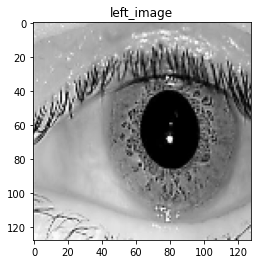

In [18]:
plt.title('left_image')
plt.imshow(image_R[1],cmap='gray')
plt.show()

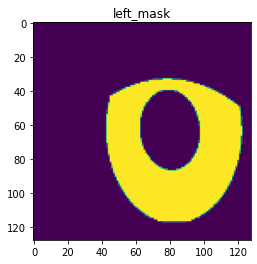

In [19]:
plt.title('left_mask')
plt.imshow(np.squeeze(mask_R[1]))
plt.show()

In [20]:
#pos_comb1 = np.array(list(combinations([1, 2, 3, 4, 5], 2)))
#pos_comb2 = np.array(list(combinations([6, 7, 8, 9, 10], 2)))

#neg_comb1 = np.array(list(product([2,3,4,5], [8,9,10])))
#print(neg_comb1)

In [21]:
folder_names = np.sort(os.listdir(path_input_images))

print(folder_names[0:20])

['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012'
 '013' '014' '015' '016' '017' '018' '019' '020']


In [22]:
# def conv2d_block(input_tensor, n_filters, kernel_size = 3, batchnorm = True):
#     """Function to add 2 convolutional layers with the parameters passed to it"""
#     # first layer
#     x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
#               kernel_initializer = 'he_normal', padding = 'same')(input_tensor)
#     if batchnorm:
#         x = BatchNormalization()(x)
#     x = Activation('relu')(x)
    
#     # second layer
#     x = Conv2D(filters = n_filters, kernel_size = (kernel_size, kernel_size),\
#               kernel_initializer = 'he_normal', padding = 'same')(x)
#     if batchnorm:
#         x = BatchNormalization()(x)
#     x = Activation('relu')(x)
    
#     return x

In [23]:
initialize_weights = 'he_normal'
initialize_bias = 'he_normal'

In [24]:
def base_network_unet_siamese():
    input = Input(shape=(128,128,1), name="base_input")
    n_filters=16
    dropout=.1
    batchnorm=True
       
    c1 = Conv2D(n_filters*1, (3,3), activation='relu',
                   kernel_initializer=initialize_weights,padding = 'same', kernel_regularizer=l2(2e-4))(input)
    p1 = MaxPooling2D((2,2))(c1)           # (h/2,w/2,16)
    p1 = Dropout(dropout)(p1) 

    c2 = Conv2D(n_filters*2, (3,3), activation='relu',
                   kernel_initializer=initialize_weights,padding = 'same', kernel_regularizer=l2(2e-4))(p1)
    p2 = MaxPooling2D((2,2))(c2)  # (h/4,w/4,32)
    p2 = Dropout(dropout)(p2) 

    c3 = Conv2D(n_filters*4, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(p2)
    p3 = MaxPooling2D((2,2))(c3)  # (h/8,w/8,64)
    p3 = Dropout(dropout)(p3) 

    c4 = Conv2D(n_filters*8, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(p3)
    p4 = MaxPooling2D((2,2))(c4)  # (h/16,w/16,128)
    p4 = Dropout(dropout)(p4) 

    c5 = Conv2D(n_filters*16, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(p4)      # (h/16,w/16,256)


    print("encoder done")


    u6 = Conv2DTranspose(n_filters * 8, (3, 3), strides = (2, 2), padding = 'same')(c5)  # (h/8,w/8,128)
    u6 = concatenate([u6, c4])   # (h/8,w/8,128)
    u6 = Dropout(dropout)(u6)
        
    c6 = Conv2D(n_filters*8, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u6) # (h/8,w/8,128)

    u7 = Conv2DTranspose(n_filters * 4, (3, 3), strides = (2, 2), padding = 'same')(c6)  # (h/4,w/4,64)
    u7 = concatenate([u7, c3])   # (h/8,w/8,128)
    u7 = Dropout(dropout)(u7)
    c7 = Conv2D(n_filters*4, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u7) # (h/4,w/4,64)

    u8 = Conv2DTranspose(n_filters * 2, (3, 3), strides = (2, 2), padding = 'same')(c7)  # (h/2,w/2,32)
    u8 = concatenate([u8, c2])   # (h/2,w/2,32)
    u8 = Dropout(dropout)(u8)
    c8 = Conv2D(n_filters*2, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u8)     # (h/2,w/2,32)

    u9 = Conv2DTranspose(n_filters, (3, 3), strides = (2, 2), padding = 'same')(c8)  # (h,w,16)
    u9 = concatenate([u9, c1])   # (h,w,16)
    u9 = Dropout(dropout)(u9)
    c9 = Conv2D(n_filters, (3,3), activation='relu',
                   kernel_initializer=initialize_weights, padding = 'same', kernel_regularizer=l2(2e-4))(u9)     # (h,w,16)    


    print("decoder done . . .  siamese network will start" )
    X_outputs = Conv2D(1,(1,1),activation='sigmoid',name='seg_out')(c9)
    
    c10 = Conv2D(64, (10,10), activation='relu',
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4))(c9)
    p10 = MaxPooling2D()(c10)
    c11 = Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p10)
    p11 = MaxPooling2D()(c11)
    c12 = Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p11)
    p12 = MaxPooling2D()(c12)
    c13 = Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4))(p12)
    a1 = Flatten()(c13)
    a2 = Dense(128, activation='relu',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias)(a1)  
    
    print("simaese model done")
    return Model(inputs=input, outputs=[X_outputs,a2])
    

In [25]:
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

encoder done
decoder done . . .  siamese network will start
simaese model done


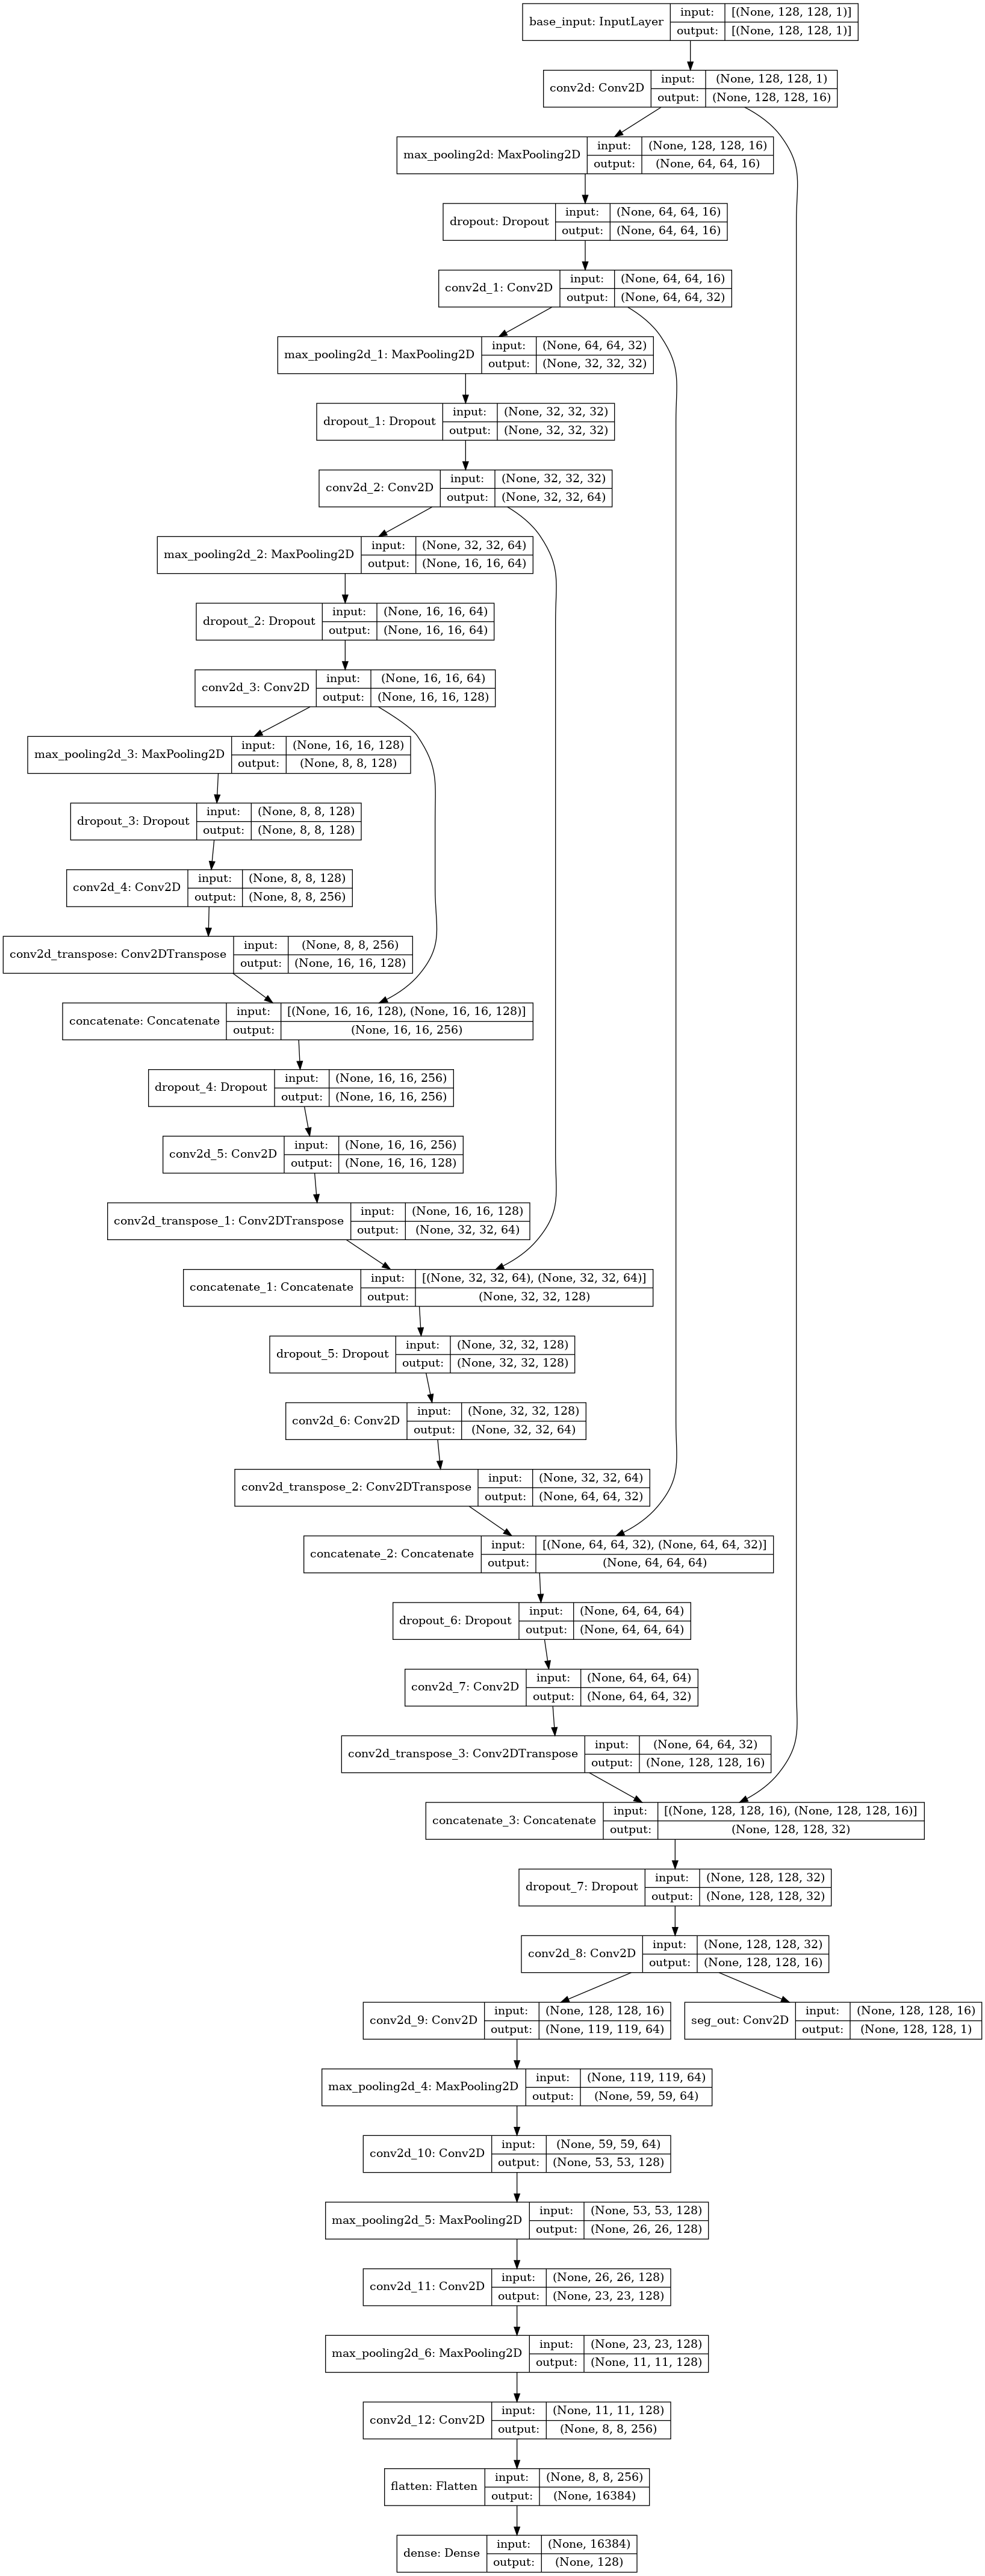

In [26]:
base_network = base_network_unet_siamese()
plot_model(base_network, show_shapes=True, show_layer_names=True, to_file='base-model.png')

In [27]:
# create the left input and point to the base network
input_a = Input(shape=(128,128,1), name="left_input")
seg_a , vect_output_a = base_network(input_a)

# create the right input and point to the base network
input_b = Input(shape=(128,128,1), name="right_input")
seg_b, vect_output_b = base_network(input_b)

# measure the similarity of the two vector outputs
output_siasmese = Lambda(euclidean_distance, name="output_layer", output_shape=eucl_dist_output_shape)([vect_output_a, vect_output_b])

# specify the inputs and output of the model
model = Model([input_a, input_b], [seg_a,seg_b,output_siasmese])


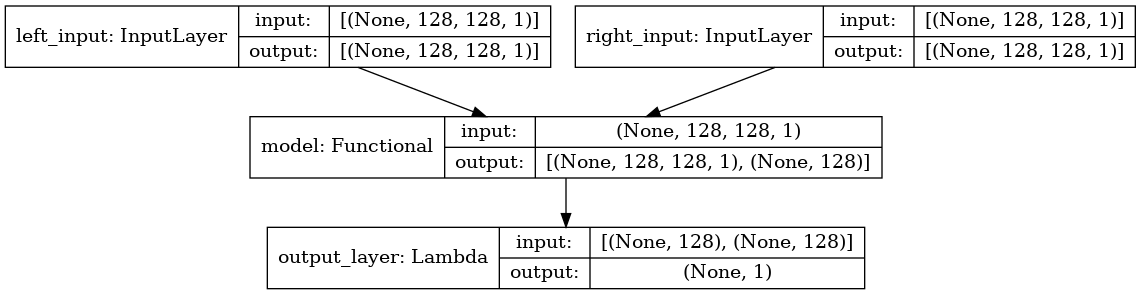

In [28]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='outer-model.png')

In [29]:
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = K.square(y_pred)
        margin_square = K.square(K.maximum(margin - y_pred, 0))
        return K.mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss

In [30]:
#optimizer = keras.optimizers.Adam(lr = 0.0001)


#siamese_model.compile(loss=custom_loss, optimizer=optimizer, metrics = ['mae', 'acc'])
model.compile(loss = {'model' : "binary_crossentropy",
                      'model_1' : "binary_crossentropy",
                      'output_layer' : contrastive_loss_with_margin(margin=1)
                     },optimizer='Adam', metrics = ['mae', 'acc'])

In [31]:
#steps_per_epoch = train_length // batch_size
batch_size = 4
steps_per_epoch = len(folder_name_list) // batch_size
validation_steps = len(folder_name_list_test) // batch_size

In [32]:

# history = siamese_model.fit_generator(imageLoader(path_input_images,folder_name_list,batch_size),steps_per_epoch,
#                     validation_data = imageLoader(path_input_images,folder_name_list_test,batch_size), 
#                     validation_steps=validation_steps, epochs=50)

In [33]:
history = model.fit_generator(imageLoader(path_input_images,folder_name_list,mask_path,batch_size),steps_per_epoch,
                    validation_data = imageLoader(path_input_images,folder_name_list_test,mask_path,batch_size), 
                    validation_steps=validation_steps, epochs=160)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/160
30/30 [==============================] - 126s 4s/step - loss: 2.3758 - model_loss: 0.6807 - model_1_loss: 0.6809 - output_layer_loss: 0.3007 - model_mae: 0.4698 - model_acc: 0.5405 - model_1_mae: 0.4701 - model_1_acc: 0.5425 - output_layer_mae: 1.1037 - output_layer_acc: 0.1997 - val_loss: 1.8996 - val_model_loss: 0.6006 - val_model_1_loss: 0.6004 - val_output_layer_loss: 0.0671 - val_model_mae: 0.3992 - val_model_acc: 0.6655 - val_model_1_mae: 0.3995 - val_model_1_acc: 0.6675 - val_output_layer_mae: 0.8924 - val_output_layer_acc: 0.0725
Epoch 2/160
30/30 [==============================] - 122s 4s/step - loss: 1.8407 - model_loss: 0.5515 - model_1_loss: 0.5547 - output_layer_loss: 0.1194 - model_mae: 0.3680 - model_acc: 0.7183 - model_1_mae: 0.3700 - model_1_acc: 0.7156 - output_layer_mae: 0.9441 - output_layer_acc: 0.0921 - val_loss: 1.8174 - val_model_loss: 0.5930 - val_model_1_loss: 0.5938 - val_output_layer_loss: 0.0626 - val_model_mae: 0.4008 - val_model_acc: 0.6609 - 

Epoch 16/160
30/30 [==============================] - 121s 4s/step - loss: 0.6795 - model_loss: 0.1047 - model_1_loss: 0.2394 - output_layer_loss: 0.0593 - model_mae: 0.0743 - model_acc: 0.9576 - model_1_mae: 0.1161 - model_1_acc: 0.9094 - output_layer_mae: 0.8756 - output_layer_acc: 0.0573 - val_loss: 0.7108 - val_model_loss: 0.1254 - val_model_1_loss: 0.2494 - val_output_layer_loss: 0.0694 - val_model_mae: 0.0937 - val_model_acc: 0.9533 - val_model_1_mae: 0.1348 - val_model_1_acc: 0.9040 - val_output_layer_mae: 0.8489 - val_output_layer_acc: 0.0725
Epoch 17/160
30/30 [==============================] - 121s 4s/step - loss: 0.6679 - model_loss: 0.1056 - model_1_loss: 0.2417 - output_layer_loss: 0.0568 - model_mae: 0.0745 - model_acc: 0.9572 - model_1_mae: 0.1163 - model_1_acc: 0.9087 - output_layer_mae: 0.9002 - output_layer_acc: 0.0488 - val_loss: 0.7058 - val_model_loss: 0.1169 - val_model_1_loss: 0.2574 - val_output_layer_loss: 0.0756 - val_model_mae: 0.0856 - val_model_acc: 0.9553 

Epoch 31/160
30/30 [==============================] - 121s 4s/step - loss: 0.4985 - model_loss: 0.0770 - model_1_loss: 0.2160 - output_layer_loss: 0.0401 - model_mae: 0.0568 - model_acc: 0.9694 - model_1_mae: 0.1025 - model_1_acc: 0.9188 - output_layer_mae: 0.9843 - output_layer_acc: 0.0276 - val_loss: 0.5675 - val_model_loss: 0.1010 - val_model_1_loss: 0.2490 - val_output_layer_loss: 0.0557 - val_model_mae: 0.0721 - val_model_acc: 0.9612 - val_model_1_mae: 0.1230 - val_model_1_acc: 0.9050 - val_output_layer_mae: 0.8756 - val_output_layer_acc: 0.0500
Epoch 32/160
30/30 [==============================] - 121s 4s/step - loss: 0.5243 - model_loss: 0.0883 - model_1_loss: 0.2350 - output_layer_loss: 0.0404 - model_mae: 0.0627 - model_acc: 0.9650 - model_1_mae: 0.1110 - model_1_acc: 0.9112 - output_layer_mae: 0.9435 - output_layer_acc: 0.0248 - val_loss: 0.5333 - val_model_loss: 0.0968 - val_model_1_loss: 0.2256 - val_output_layer_loss: 0.0532 - val_model_mae: 0.0719 - val_model_acc: 0.9642 

Epoch 46/160
30/30 [==============================] - 121s 4s/step - loss: 0.4911 - model_loss: 0.0749 - model_1_loss: 0.2226 - output_layer_loss: 0.0748 - model_mae: 0.0555 - model_acc: 0.9716 - model_1_mae: 0.1108 - model_1_acc: 0.9119 - output_layer_mae: 0.9501 - output_layer_acc: 0.0567 - val_loss: 0.4856 - val_model_loss: 0.0826 - val_model_1_loss: 0.2150 - val_output_layer_loss: 0.0700 - val_model_mae: 0.0581 - val_model_acc: 0.9657 - val_model_1_mae: 0.1085 - val_model_1_acc: 0.9133 - val_output_layer_mae: 0.8184 - val_output_layer_acc: 0.0700
Epoch 47/160
30/30 [==============================] - 121s 4s/step - loss: 0.4526 - model_loss: 0.0709 - model_1_loss: 0.2200 - output_layer_loss: 0.0443 - model_mae: 0.0495 - model_acc: 0.9703 - model_1_mae: 0.1010 - model_1_acc: 0.9168 - output_layer_mae: 0.9271 - output_layer_acc: 0.0288 - val_loss: 0.4758 - val_model_loss: 0.0813 - val_model_1_loss: 0.2261 - val_output_layer_loss: 0.0535 - val_model_mae: 0.0580 - val_model_acc: 0.9673 

Epoch 61/160
30/30 [==============================] - 121s 4s/step - loss: 0.3678 - model_loss: 0.0644 - model_1_loss: 0.1943 - output_layer_loss: 0.0242 - model_mae: 0.0450 - model_acc: 0.9722 - model_1_mae: 0.0948 - model_1_acc: 0.9211 - output_layer_mae: 1.0035 - output_layer_acc: 0.0132 - val_loss: 0.4206 - val_model_loss: 0.0852 - val_model_1_loss: 0.2076 - val_output_layer_loss: 0.0441 - val_model_mae: 0.0630 - val_model_acc: 0.9693 - val_model_1_mae: 0.1159 - val_model_1_acc: 0.9174 - val_output_layer_mae: 0.9025 - val_output_layer_acc: 0.0300
Epoch 62/160
30/30 [==============================] - 121s 4s/step - loss: 0.3857 - model_loss: 0.0699 - model_1_loss: 0.2068 - output_layer_loss: 0.0254 - model_mae: 0.0515 - model_acc: 0.9731 - model_1_mae: 0.1070 - model_1_acc: 0.9165 - output_layer_mae: 1.0149 - output_layer_acc: 0.0146 - val_loss: 0.4205 - val_model_loss: 0.0781 - val_model_1_loss: 0.2094 - val_output_layer_loss: 0.0503 - val_model_mae: 0.0574 - val_model_acc: 0.9700 

Epoch 76/160
30/30 [==============================] - 121s 4s/step - loss: 0.3619 - model_loss: 0.0590 - model_1_loss: 0.2001 - output_layer_loss: 0.0296 - model_mae: 0.0420 - model_acc: 0.9749 - model_1_mae: 0.0992 - model_1_acc: 0.9165 - output_layer_mae: 0.9898 - output_layer_acc: 0.0292 - val_loss: 0.4030 - val_model_loss: 0.0739 - val_model_1_loss: 0.2133 - val_output_layer_loss: 0.0438 - val_model_mae: 0.0500 - val_model_acc: 0.9673 - val_model_1_mae: 0.1025 - val_model_1_acc: 0.9158 - val_output_layer_mae: 0.9743 - val_output_layer_acc: 0.0350
Epoch 77/160
30/30 [==============================] - 121s 4s/step - loss: 0.3640 - model_loss: 0.0651 - model_1_loss: 0.2046 - output_layer_loss: 0.0228 - model_mae: 0.0459 - model_acc: 0.9731 - model_1_mae: 0.1015 - model_1_acc: 0.9161 - output_layer_mae: 1.0180 - output_layer_acc: 0.0100 - val_loss: 0.4007 - val_model_loss: 0.0769 - val_model_1_loss: 0.2008 - val_output_layer_loss: 0.0531 - val_model_mae: 0.0546 - val_model_acc: 0.9696 

Epoch 91/160
30/30 [==============================] - 121s 4s/step - loss: 0.5472 - model_loss: 0.0927 - model_1_loss: 0.2378 - output_layer_loss: 0.0953 - model_mae: 0.0684 - model_acc: 0.9661 - model_1_mae: 0.1163 - model_1_acc: 0.9110 - output_layer_mae: 1.1092 - output_layer_acc: 0.0883 - val_loss: 0.5240 - val_model_loss: 0.1027 - val_model_1_loss: 0.2480 - val_output_layer_loss: 0.0566 - val_model_mae: 0.0768 - val_model_acc: 0.9634 - val_model_1_mae: 0.1243 - val_model_1_acc: 0.9080 - val_output_layer_mae: 1.0652 - val_output_layer_acc: 0.0650
Epoch 92/160
30/30 [==============================] - 121s 4s/step - loss: 0.5144 - model_loss: 0.0785 - model_1_loss: 0.2216 - output_layer_loss: 0.0993 - model_mae: 0.0572 - model_acc: 0.9689 - model_1_mae: 0.1016 - model_1_acc: 0.9201 - output_layer_mae: 1.0222 - output_layer_acc: 0.1068 - val_loss: 0.5579 - val_model_loss: 0.1153 - val_model_1_loss: 0.2378 - val_output_layer_loss: 0.0929 - val_model_mae: 0.0882 - val_model_acc: 0.9602 

Epoch 106/160
30/30 [==============================] - 121s 4s/step - loss: 0.3829 - model_loss: 0.0673 - model_1_loss: 0.1923 - output_layer_loss: 0.0511 - model_mae: 0.0472 - model_acc: 0.9710 - model_1_mae: 0.0907 - model_1_acc: 0.9255 - output_layer_mae: 1.0427 - output_layer_acc: 0.0435 - val_loss: 0.4259 - val_model_loss: 0.0805 - val_model_1_loss: 0.2158 - val_output_layer_loss: 0.0579 - val_model_mae: 0.0593 - val_model_acc: 0.9696 - val_model_1_mae: 0.1101 - val_model_1_acc: 0.9158 - val_output_layer_mae: 0.9926 - val_output_layer_acc: 0.0825
Epoch 107/160
30/30 [==============================] - 121s 4s/step - loss: 0.4172 - model_loss: 0.0709 - model_1_loss: 0.2219 - output_layer_loss: 0.0529 - model_mae: 0.0529 - model_acc: 0.9734 - model_1_mae: 0.1050 - model_1_acc: 0.9172 - output_layer_mae: 1.0299 - output_layer_acc: 0.0658 - val_loss: 0.4320 - val_model_loss: 0.0757 - val_model_1_loss: 0.2326 - val_output_layer_loss: 0.0533 - val_model_mae: 0.0540 - val_model_acc: 0.969

Epoch 121/160
30/30 [==============================] - 121s 4s/step - loss: 0.3636 - model_loss: 0.0619 - model_1_loss: 0.2046 - output_layer_loss: 0.0348 - model_mae: 0.0431 - model_acc: 0.9737 - model_1_mae: 0.0987 - model_1_acc: 0.9170 - output_layer_mae: 1.0716 - output_layer_acc: 0.0229 - val_loss: 0.4187 - val_model_loss: 0.0784 - val_model_1_loss: 0.2190 - val_output_layer_loss: 0.0603 - val_model_mae: 0.0565 - val_model_acc: 0.9679 - val_model_1_mae: 0.1108 - val_model_1_acc: 0.9116 - val_output_layer_mae: 0.9850 - val_output_layer_acc: 0.0850
Epoch 122/160
30/30 [==============================] - 121s 4s/step - loss: 0.3632 - model_loss: 0.0630 - model_1_loss: 0.2024 - output_layer_loss: 0.0369 - model_mae: 0.0443 - model_acc: 0.9732 - model_1_mae: 0.0933 - model_1_acc: 0.9223 - output_layer_mae: 1.1098 - output_layer_acc: 0.0318 - val_loss: 0.3865 - val_model_loss: 0.0692 - val_model_1_loss: 0.2058 - val_output_layer_loss: 0.0515 - val_model_mae: 0.0458 - val_model_acc: 0.969

Epoch 136/160
30/30 [==============================] - 121s 4s/step - loss: 0.3468 - model_loss: 0.0609 - model_1_loss: 0.2056 - output_layer_loss: 0.0258 - model_mae: 0.0425 - model_acc: 0.9737 - model_1_mae: 0.0994 - model_1_acc: 0.9156 - output_layer_mae: 1.0431 - output_layer_acc: 0.0103 - val_loss: 0.4026 - val_model_loss: 0.0698 - val_model_1_loss: 0.2217 - val_output_layer_loss: 0.0569 - val_model_mae: 0.0486 - val_model_acc: 0.9709 - val_model_1_mae: 0.1027 - val_model_1_acc: 0.9150 - val_output_layer_mae: 0.9385 - val_output_layer_acc: 0.0925
Epoch 137/160
30/30 [==============================] - 121s 4s/step - loss: 0.3507 - model_loss: 0.0629 - model_1_loss: 0.1973 - output_layer_loss: 0.0363 - model_mae: 0.0445 - model_acc: 0.9735 - model_1_mae: 0.0974 - model_1_acc: 0.9184 - output_layer_mae: 1.0161 - output_layer_acc: 0.0235 - val_loss: 0.4162 - val_model_loss: 0.0818 - val_model_1_loss: 0.2120 - val_output_layer_loss: 0.0683 - val_model_mae: 0.0566 - val_model_acc: 0.968

Epoch 151/160
30/30 [==============================] - 121s 4s/step - loss: 0.3097 - model_loss: 0.0578 - model_1_loss: 0.1889 - output_layer_loss: 0.0132 - model_mae: 0.0408 - model_acc: 0.9755 - model_1_mae: 0.0962 - model_1_acc: 0.9183 - output_layer_mae: 1.1140 - output_layer_acc: 0.0012 - val_loss: 0.3764 - val_model_loss: 0.0681 - val_model_1_loss: 0.2208 - val_output_layer_loss: 0.0382 - val_model_mae: 0.0448 - val_model_acc: 0.9697 - val_model_1_mae: 0.1006 - val_model_1_acc: 0.9136 - val_output_layer_mae: 1.0860 - val_output_layer_acc: 0.0500
Epoch 152/160
30/30 [==============================] - 121s 4s/step - loss: 0.3099 - model_loss: 0.0564 - model_1_loss: 0.1860 - output_layer_loss: 0.0183 - model_mae: 0.0387 - model_acc: 0.9749 - model_1_mae: 0.0913 - model_1_acc: 0.9228 - output_layer_mae: 1.1353 - output_layer_acc: 0.0040 - val_loss: 0.4374 - val_model_loss: 0.0651 - val_model_1_loss: 0.2743 - val_output_layer_loss: 0.0490 - val_model_mae: 0.0400 - val_model_acc: 0.969

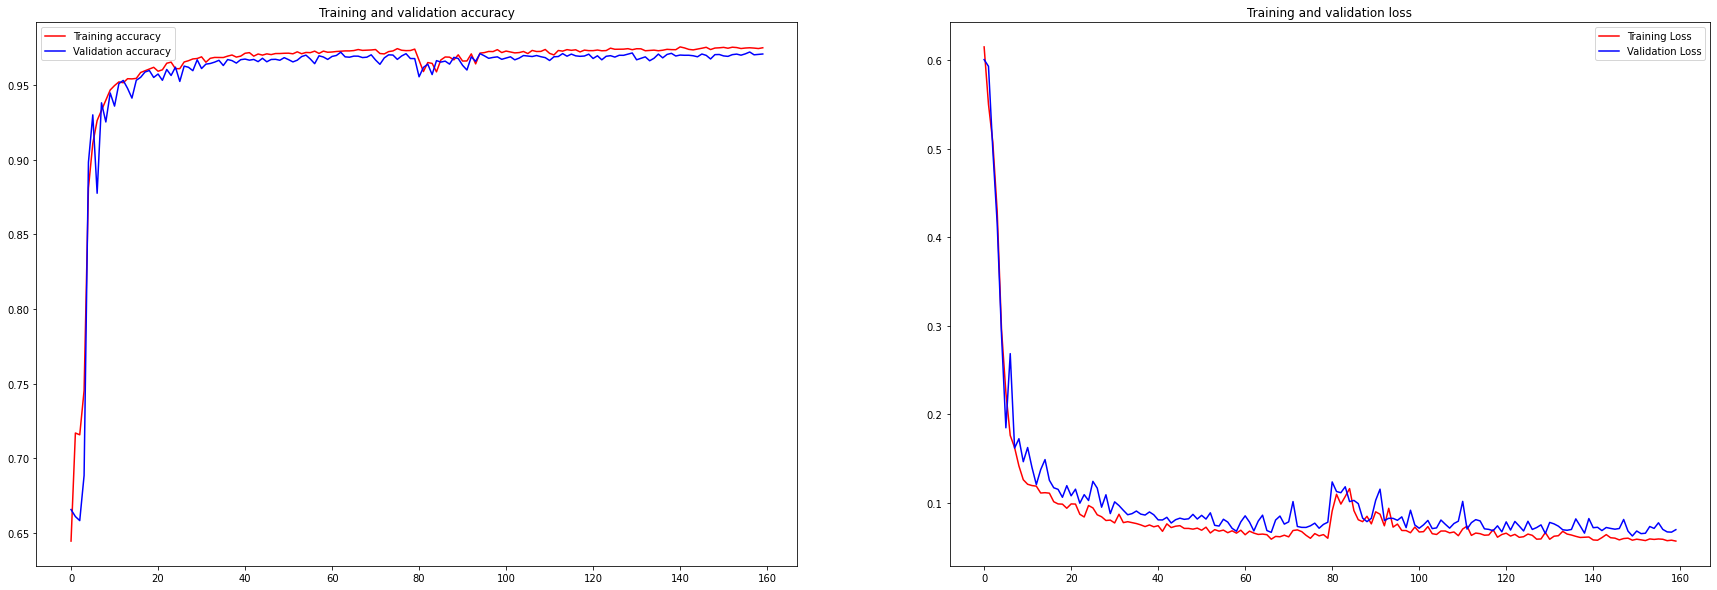

In [34]:
import matplotlib.pyplot as plt
# Let's take a look at how we did during training.
acc = history.history['model_acc']
val_acc = history.history['val_model_acc']

loss = history.history['model_loss']
val_loss = history.history['val_model_loss']
epochs = range(len(acc))

# Accuracy
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
ax[0].plot(epochs, acc, 'r', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set_title('Training and validation accuracy')
ax[0].legend()

# Loss
ax[1].plot(epochs, loss, 'r', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set_title('Training and validation loss')
ax[1].legend()

plt.show()

In [35]:
model_save_path = '/tensorflow/siamese_model/siamese_unet_pixel_half_seg_160epoch_120_train_test.h5'
model.save(model_save_path)

In [36]:
model = load_model(model_save_path,custom_objects={'contrastive_loss':contrastive_loss_with_margin(margin=1)})

In [37]:
Out = next((imageLoader(path_input_images,folder_name_list_test,mask_path,1)))

In [38]:
images_L_R = Out[0]
image_L = images_L_R[0]
image_R = images_L_R[1]

mask_L_R_class = Out[1]

mask_L = mask_L_R_class[0]
mask_R = mask_L_R_class[1]
y = mask_L_R_class[2]
print(y[0])
print(image_L.shape)
#plt.title('left_mask')
#plt.imshow(np.squeeze(mask_R[1]))
#plt.imshow(image_R[1])
#plt.show()

1.0
(4, 128, 128, 1)


In [39]:




preds = model.predict([image_L,image_R])





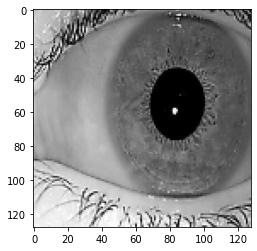

In [40]:

#plt.imshow(np.squeeze(mask_R[1]))
plt.imshow(image_R[1],cmap='gray')
plt.show()

In [41]:
out_image = np.squeeze(preds[1][1])
preds[0].shape

(4, 128, 128, 1)

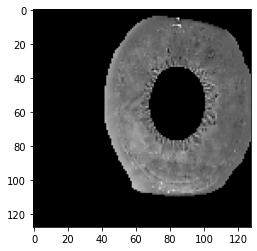

In [42]:

dummy_image = image_R[1].copy() 
dummy_image[out_image<.5] = 0
plt.imshow(dummy_image,cmap='gray')
plt.show()

In [43]:
y = preds[2]
print(y)

[[0.14880417]
 [0.25982606]
 [1.271221  ]
 [1.7813817 ]]


## Test data for model 

In [44]:
test_out1,test_out2,test_seg1,test_seg2,y_class = read_simaese_parametric_data(path_input_images,folder_name_list[0:100],mask_path,100)

In [45]:
test_out1 = test_out1/255.0
test_out2 = test_out2/255.0
# test_seg1 = test_seg1/255.0
# test_seg2 = test_seg2/255.0

In [46]:
[test_seg_out1,test_seg_out2, y_pred] = model.predict([test_out1,test_out2])

In [47]:
test_seg2.shape

(400, 128, 128, 1)

In [48]:
def show_images(test_out1,test_seg_out1):
    #num_images = len(test_seg_out1)
    num_images = 20
    for i in range(0,num_images,4):
        dummy_image = np.squeeze(test_out1[i]).copy()
        seg_img = np.squeeze(test_seg_out1[i])
        dummy_image[seg_img<.5] = 0
        plt.imshow(np.squeeze(test_out1[i]),cmap='gray')
        plt.show()
        plt.imshow(dummy_image,cmap='gray')
        plt.show()

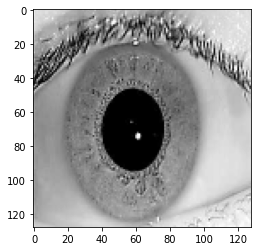

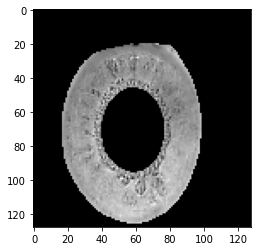

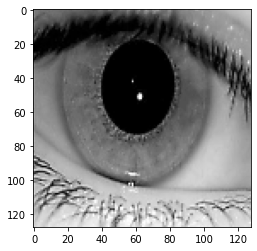

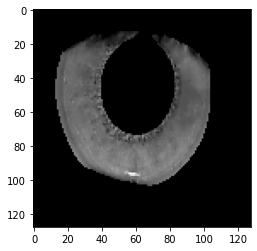

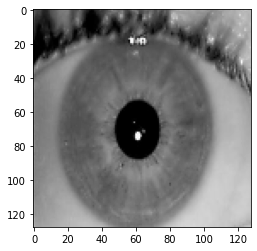

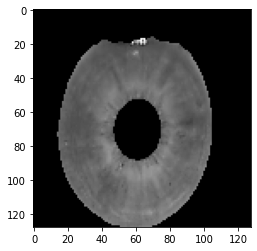

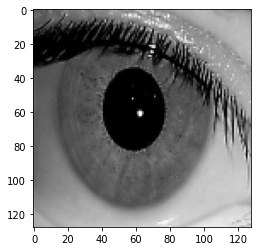

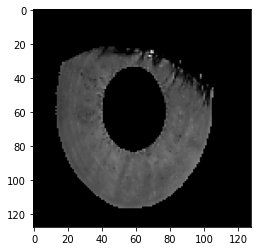

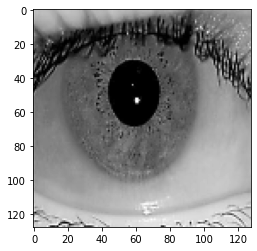

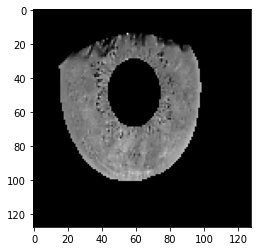

In [49]:
show_images(test_out2,test_seg_out2)

In [50]:
def compute_accuracy(y_true, y_pred):
    '''Compute classification accuracy with a fixed threshold on distances.
    '''
    pred = y_pred.ravel() < 0.5
    return np.mean(pred == y_true)

In [51]:
compute_accuracy(y_class, y_pred)      ## trained on 120 images and tested on 100 persons 

0.99

In [52]:
!{sys.executable} -m pip install -U scikit-learn scipy

     |################################| 22.2 MB 10.5 MB/s eta 0:00:01
     |################################| 303 kB 10.8 MB/s eta 0:00:01


In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_class, y_pred.ravel() < 0.5)                      ##   [TN , FP]
                                                                     ##     [FN , TP] 

array([[200,   0],
       [  4, 196]])